Max Amp and Amp Ratio from offshore statistics and onshore statistics

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Load common data from your selected stations
max_amp_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleve53550.offshore.txt'
waveperiod_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleveWP53550.offshore.txt'
dominant_period_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleveDP53550.offshore.txt'
df_amp = pd.read_csv(max_amp_file, sep='\t')
df_wp = pd.read_csv(waveperiod_file, sep='\t')
df_dp = pd.read_csv(dominant_period_file, sep='\t')
id = df_amp.iloc[:, 0]

#CT-df
st = 38 #38/41 for CT and 54 for SR
# Extract the data for the selected station
max_amp = df_amp.iloc[:, st]
waveperiod = df_wp.iloc[:, st]
dominantperiod = df_dp.iloc[:, st]

max_ht_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/CHeight_CT_alleve53550.onshore.txt'
df_ht = pd.read_csv(max_ht_file, sep='\t')
max_ht = df_ht['hmax']
max_depth = df_ht['dmax']
#abs max of dzmin or dzmax
max_adz = df_ht[['dzmax', 'dzmin']].abs().max(axis=1)

# Create a DataFrame for the selected station
df = pd.DataFrame({'id': id,
                'max_amp': max_amp,
                'waveperiod': waveperiod,
                'dominantperiod': dominantperiod,
                'max_ht': max_ht,
                'max_adz': max_adz,
                'max_depth': max_depth})

# Split the first 2 characters of id into a new column 'type'
df['type'] = df['id'].str[:2]
df['amp_ratio'] = df['max_ht']/df['max_amp']

#filter events with max_adz < 0.1
# df = df[df['max_adz'] < 0.1]
# df = df[df['max_amp'] > 0.1]

#SR-df2
st = 54
# Extract the data for the selected station
max_amp = df_amp.iloc[:, st]
waveperiod = df_wp.iloc[:, st]
dominantperiod = df_dp.iloc[:, st]
max_ht_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/CHeight_SR_alleve53550.onshore.txt'
df2_ht = pd.read_csv(max_ht_file, sep='\t')
max_ht = df2_ht['hmax']
max_depth = df2_ht['dmax']
#abs max of dzmin or dzmax
max_adz = df2_ht[['dzmax', 'dzmin']].abs().max(axis=1)#abs max of dzmin or dzmax

# Create a DataFrame for the selected station
df2 = pd.DataFrame({'id': id,
                    'max_amp': max_amp,
                    'waveperiod': waveperiod,
                    'dominantperiod': dominantperiod,
                    'max_ht': max_ht,
                    'max_adz': max_adz,
                    'max_depth': max_depth})

# Split the first 2 characters of id into a new column 'type'
df2['type'] = df2['id'].str[:2]
df2['amp_ratio'] = df2['max_ht']/df2['max_amp']

#filter events with max_adz < 0.1
# df2 = df2[df2['max_adz'] < 0.1]
# df2 = df2[df2['max_amp'] > 0.1]


Type vs Magnitude

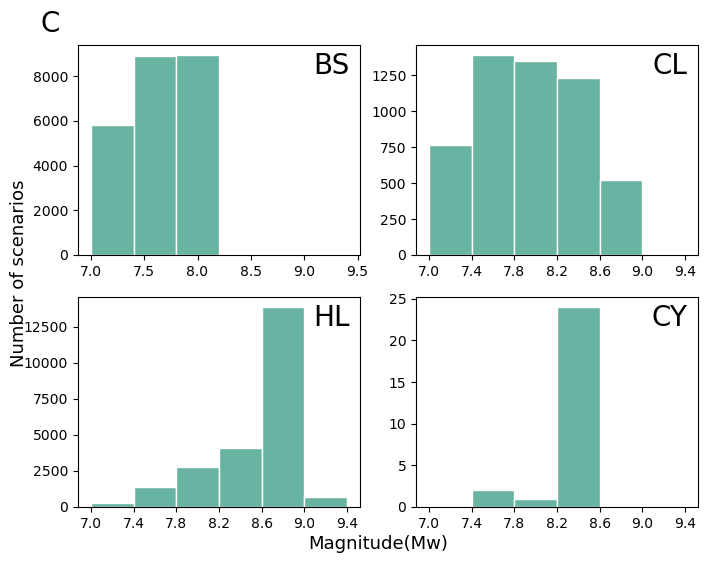

In [ ]:
import matplotlib.pyplot as plt

# Read earthquake events data from txt files
data_BS = pd.read_csv('../../resources/processed/eve_BS.txt',sep='\t')
data_PS = pd.read_csv('../../resources/processed/eve_PS_SourceRegion.txt',sep='\t')

#plot historgram across source regions of the magnitude
bins = np.arange( 7.0,  9.4, 0.4)
fig, ax = plt.subplots(2,2,figsize=(8,6))

#plot as subplots
ax[0,0].hist(data_BS['Mag'], bins = bins, facecolor='#69b3a2', align='mid',edgecolor='white',)
ax[0,1].hist(data_PS[data_PS['SR']=='CL']['Mag'], bins = bins, facecolor='#69b3a2', align='mid',edgecolor='white',)
ax[1,0].hist(data_PS[data_PS['SR']=='HL']['Mag'], bins = bins, facecolor='#69b3a2', align='mid',edgecolor='white',)
ax[1,1].hist(data_PS[data_PS['SR']=='CY']['Mag'], bins = bins, facecolor='#69b3a2', align='mid',edgecolor='white',)

#set common xlabel and ticks
ax[0,1].set_xticks(bins)
ax[1,0].set_xticks(bins)
ax[1,1].set_xticks(bins)
ax[1,0].set_xticks(bins)

#set labels
ax[0,0].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)
# # ax[0,1].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[0,1].transAxes,fontsize=20)
# # ax[1,0].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)
# # ax[1,1].text(-0.1,1.1,'D',horizontalalignment='center',verticalalignment='center',transform=ax[1,1].transAxes,fontsize=20)

#set labels
ax[0,0].text(0.9,0.9,'BS',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)
ax[0,1].text(0.9,0.9,'CL',horizontalalignment='center',verticalalignment='center',transform=ax[0,1].transAxes,fontsize=20)
ax[1,0].text(0.9,0.9,'HL',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)
ax[1,1].text(0.9,0.9,'CY',horizontalalignment='center',verticalalignment='center',transform=ax[1,1].transAxes,fontsize=20)

#common x and y label
fig.text(0.04, 0.5, 'Number of scenarios', va='center', rotation='vertical', fontsize = 13)
fig.text(0.5, 0.04, 'Magnitude(Mw)', ha='center', fontsize = 13)

#save figure
plt.savefig('./plots/earthquake_mag.png', dpi=600, bbox_inches='tight')

Histogram of tsunami parameters

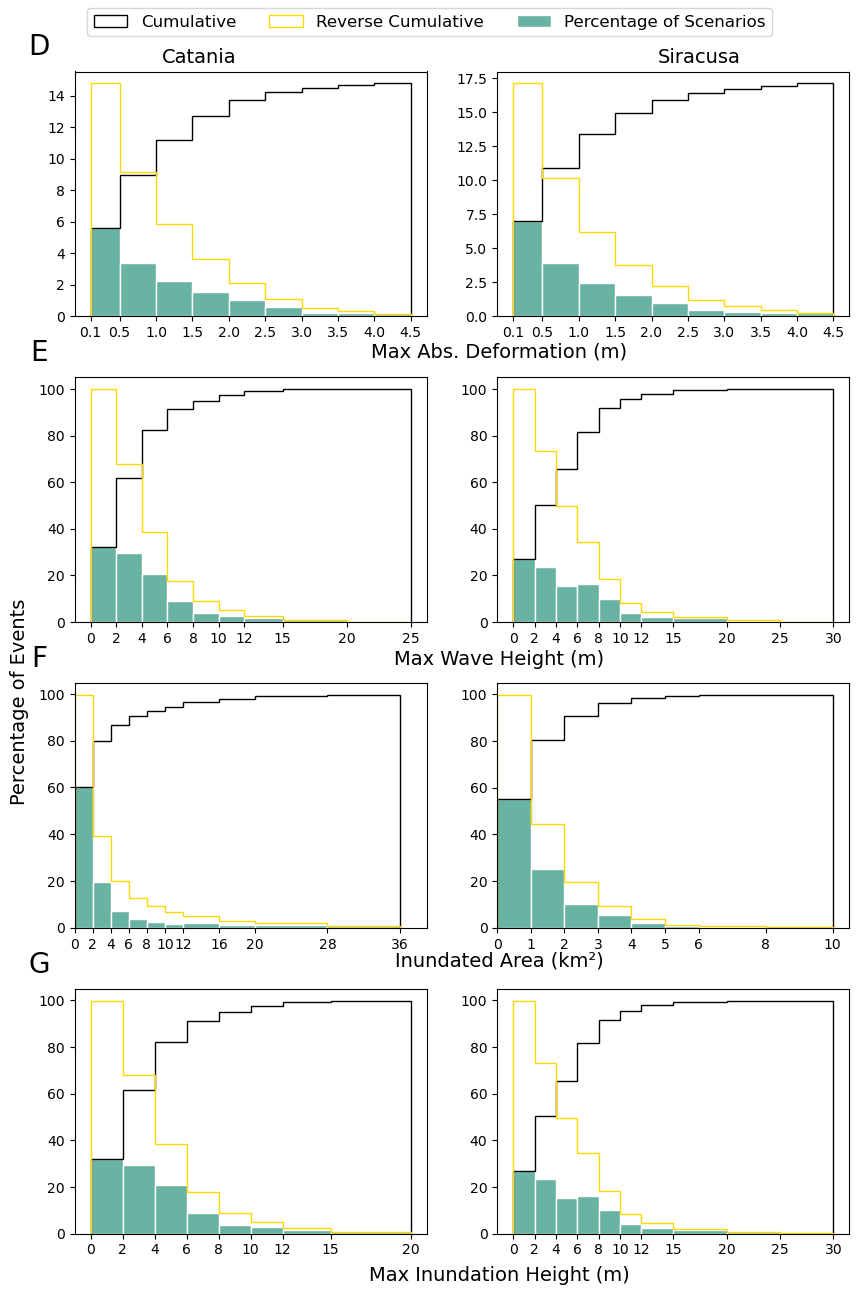

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df, df2, df_ht, df2_ht are defined elsewhere in your script

def plot_hist(ax, data, bins):
    ax.hist(data,
            weights=100.0 * np.ones(len(data)) / len(data),
            bins=bins, align='mid',
            histtype='step', label='Cumulative',
            cumulative=True,
            color='k')
    ax.hist(data,
            weights=100.0 * np.ones(len(data)) / len(data),
            bins=bins, align='mid',
            histtype='step', label='Reverse Cumulative',
            cumulative=-1,
            color='gold')
    ax.hist(data,
            weights=100.0 * np.ones(len(data)) / len(data),
            bins=bins, align='mid', facecolor='#69b3a2',
            edgecolor='white',
            label='Percentage of Scenarios',
            cumulative=False)
    ax.set_xticks(bins)
    ax.set_ylabel('')

fig, ax = plt.subplots(4, 2, figsize=(10, 14))
ax = ax.flatten()
row_titles = ['Max Abs. Deformation (m)', 'Max Wave Height (m)', 'Inundated Area (km²)', 'Max Inundation Height (m)']

# Max Absolute Deformation
bins_CT = np.concatenate((np.arange(0.1, 0.1, 0.1), np.arange(0.1, 0.5, 0.5), np.arange(0.5, 5, 0.5)))
bins_SR = bins_CT

plot_hist(ax[0], df['max_adz'], bins_CT) 
plot_hist(ax[1], df2['max_adz'], bins_SR)

# Max Wave Height
bins_CT = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 15, 3), np.arange(15, 30, 5)))
bins_SR = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 15, 3), np.arange(15, 35, 5)))

plot_hist(ax[2], df['max_ht'], bins_CT)
plot_hist(ax[3], df2['max_ht'], bins_SR)

# Inundated Area
bins_CT = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 20, 4), np.arange(20, 42, 8)))
bins_SR = np.concatenate((np.arange(0, 4, 1), np.arange(4, 6, 1), np.arange(6, 12, 2)))

plot_hist(ax[4], df_ht['count'] * 0.0001, bins_CT)
plot_hist(ax[5], df2_ht['count'] * 0.0001, bins_SR)

ax[4].set_xlim(0, 39)
ax[5].set_xlim(0, 10.5)

# Max Inundation Height
bins_CT = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 15, 3), np.arange(15, 25, 5)))
bins_SR = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 15, 3), np.arange(15, 35, 5)))

plot_hist(ax[6], df_ht['hmax'], bins_CT)
plot_hist(ax[7], df2_ht['hmax'], bins_SR)

# Common y-label
fig.text(0.07, 0.5, 'Percentage of Events', ha='center', va='center', rotation='vertical', fontsize=14)

# Common x-labels for each row
fig.text(0.55, 0.75, row_titles[0], ha='center', va='center', fontsize=14) 
fig.text(0.55, 0.53, row_titles[1], ha='center', va='center', fontsize=14) 
fig.text(0.55, 0.315, row_titles[2], ha='center', va='center', fontsize=14) 
fig.text(0.55, 0.09, row_titles[3], ha='center', va='center', fontsize=14) 

#set labels
ax[0].text(-0.1,1.1,'D',horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes,fontsize=20)
ax[2].text(-0.1,1.1,'E',horizontalalignment='center',verticalalignment='center',transform=ax[2].transAxes,fontsize=20)
ax[4].text(-0.1,1.1,'F',horizontalalignment='center',verticalalignment='center',transform=ax[4].transAxes,fontsize=20)
ax[6].text(-0.1,1.1,'G',horizontalalignment='center',verticalalignment='center',transform=ax[6].transAxes,fontsize=20)

# Add label of sites on the top of each column
fig.text(0.25, .96, 'Catania', ha='center', va='center', fontsize=14)
fig.text(0.75, .96, 'Siracusa', ha='center', va='center', fontsize=14)

# # Collect all handles and labels for legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=12, ncol=3)
plt.subplots_adjust(top=0.95, bottom=0.12, hspace=0.25, wspace=0.2)
plt.savefig('./plots/combined_hist.png', dpi=600, bbox_inches='tight')


Train vs Test

In [174]:
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
list_size_CT = ['892','1658','3454','7071'][1]
list_size_SR = ['961','1773','3669','6941'][1]
train_df_CT = pd.DataFrame()
train_df_SR = pd.DataFrame()
eve_perf_CT = pd.read_csv(f'{MLDir}/model/CT/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{list_size_CT}_compile_combined.csv')
eve_perf_SR = pd.read_csv(f'{MLDir}/model/SR/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{list_size_SR}_compile_combined.csv')
eve_perf_CT=eve_perf_CT[eve_perf_CT['split'] == 'train']
eve_perf_SR=eve_perf_SR[eve_perf_SR['split'] == 'train']
#update split column with size instead
eve_perf_CT['size'] = list_size_CT
eve_perf_SR['size'] = list_size_CT
#append as rows
train_df_CT = pd.concat([train_df_CT,eve_perf_CT])
train_df_SR = pd.concat([train_df_SR,eve_perf_SR])
variables = ['max_absdz','max_off','true','truemax']


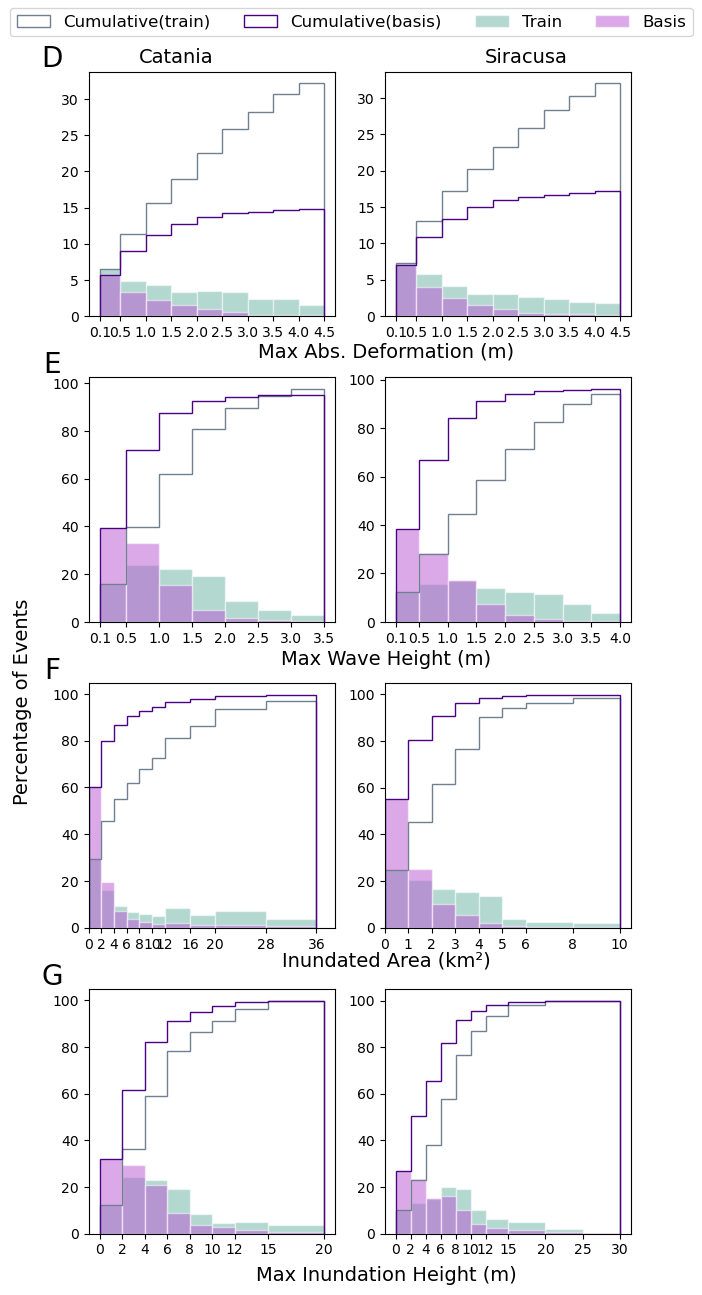

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df, df2, df_ht, df2_ht are defined elsewhere in your script

def plot_hist(ax, basis, train, bins):
    ax.hist(train,
            weights=100.0 * np.ones(len(train)) / len(train),
            bins=bins, align='mid',
            histtype='step', label='Cumulative(train)',
            cumulative=True,
            color='slategrey'
            ) 
    ax.hist(basis,
            weights=100.0 * np.ones(len(basis)) / len(basis),
            bins=bins, align='mid',
            histtype='step', label='Cumulative(basis)',
            cumulative=True,
            color='indigo'
            )
#     ax.hist(data,
#             weights=100.0 * np.ones(len(data)) / len(data),
#             bins=bins, align='mid',
#             histtype='step', label='Reverse Cumulative',
#             cumulative=-1)
    ax.hist(train,
            weights=100.0 * np.ones(len(train)) / len(train),
            bins=bins, align='mid', facecolor='#69b3a2',
            edgecolor='white',
            label='Train',
            cumulative=False,alpha=0.5)
    ax.hist(basis,
            weights=100.0 * np.ones(len(basis)) / len(basis),
            bins=bins, align='mid', facecolor='mediumorchid',
            edgecolor='white',
            label='Basis',
            cumulative=False,alpha=0.5)
    ax.set_xticks(bins)
    ax.set_ylabel('')

fig, ax = plt.subplots(4, 2, figsize=(7, 14))
ax = ax.flatten()
row_titles = ['Max Abs. Deformation (m)', 'Max Wave Height (m)', 'Inundated Area (km²)', 'Max Inundation Height (m)']

# Max Absolute Deformation
bins_CT = np.concatenate((np.arange(0.1, 0.1, 0.1), np.arange(0.1, 0.5, 0.5), np.arange(0.5, 5, 0.5)))
bins_SR = bins_CT

plot_hist(ax[0], df['max_adz'],train_df_CT['max_absdz'], bins_CT) 
plot_hist(ax[1], df2['max_adz'],train_df_SR['max_absdz'], bins_SR)

# Max Wave Height
bins_CT = np.concatenate((np.arange(0.1, 0.1, 0.1), np.arange(0.1, 0.5, 0.5), np.arange(0.5, 4, 0.5)))
bins_SR = np.concatenate((np.arange(0.1, 0.1, 0.1), np.arange(0.1, 0.5, 0.5), np.arange(0.5, 4.5, 0.5 )))

plot_hist(ax[2], df['max_amp'],train_df_CT['max_off'], bins_CT) 
plot_hist(ax[3], df2['max_amp'],train_df_SR['max_off'], bins_SR)

# Inundated Area
bins_CT = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 20, 4), np.arange(20, 42, 8)))
bins_SR = np.concatenate((np.arange(0, 4, 1), np.arange(4, 6, 1), np.arange(6, 12, 2)))

plot_hist(ax[4], df_ht['count'] * 0.0001, train_df_CT['true']* 0.0001, bins_CT)
plot_hist(ax[5], df2_ht['count'] * 0.0001, train_df_SR['true']* 0.0001, bins_SR)

ax[4].set_xlim(0, 39)
ax[5].set_xlim(0, 10.5)

# Max Inundation Height
bins_CT = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 15, 3), np.arange(15, 25, 5)))
bins_SR = np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 15, 3), np.arange(15, 35, 5)))

plot_hist(ax[6], df_ht['hmax'],train_df_CT['truemax'], bins_CT)
plot_hist(ax[7], df2_ht['hmax'], train_df_SR['truemax'], bins_SR)
# Common y-label
fig.text(0.03, 0.5, 'Percentage of Events', ha='center', va='center', rotation='vertical', fontsize=14)

# Common x-labels for each row
fig.text(0.55, 0.75, row_titles[0], ha='center', va='center', fontsize=14) 
fig.text(0.55, 0.53, row_titles[1], ha='center', va='center', fontsize=14) 
fig.text(0.55, 0.315, row_titles[2], ha='center', va='center', fontsize=14) 
fig.text(0.55, 0.09, row_titles[3], ha='center', va='center', fontsize=14) 

#set labels
ax[0].text(-0.15,1.05,'D',horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes,fontsize=20)
ax[2].text(-0.15,1.05,'E',horizontalalignment='center',verticalalignment='center',transform=ax[2].transAxes,fontsize=20)
ax[4].text(-0.15,1.05,'F',horizontalalignment='center',verticalalignment='center',transform=ax[4].transAxes,fontsize=20)
ax[6].text(-0.15,1.05,'G',horizontalalignment='center',verticalalignment='center',transform=ax[6].transAxes,fontsize=20)

# Add label of sites on the top of each column
fig.text(0.25, .96, 'Catania', ha='center', va='center', fontsize=14)
fig.text(0.75, .96, 'Siracusa', ha='center', va='center', fontsize=14)

# # Collect all handles and labels for legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=12, ncol=4)
plt.subplots_adjust(top=0.95, bottom=0.12, hspace=0.25, wspace=0.2)
plt.savefig('./plots/combined_hist.png', dpi=600, bbox_inches='tight')


In [179]:
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
list_size_CT = ['892','1658','3454','7071']
list_size_SR = ['961','1773','3669','6941']  
train_df_CT = pd.DataFrame()
train_df_SR = pd.DataFrame()
for size in range(4):
    eve_perf_CT = pd.read_csv(f'{MLDir}/model/CT/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{list_size_CT[size]}_compile_combined.csv')
    eve_perf_SR = pd.read_csv(f'{MLDir}/model/SR/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{list_size_SR[size]}_compile_combined.csv')
    eve_perf_CT=eve_perf_CT[eve_perf_CT['split'] == 'train']
    eve_perf_SR=eve_perf_SR[eve_perf_SR['split'] == 'train']
    #update split column with size instead
    eve_perf_CT['size'] = str(size)
    eve_perf_SR['size'] = str(size)
    #append as rows
    train_df_CT = pd.concat([train_df_CT,eve_perf_CT])
    train_df_SR = pd.concat([train_df_SR,eve_perf_SR])
eve_perf_CT = pd.read_csv(f'{MLDir}/model/CT/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{list_size_CT[size]}_compile_combined.csv')
eve_perf_SR = pd.read_csv(f'{MLDir}/model/SR/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{list_size_SR[size]}_compile_combined.csv')
eve_perf_CT['split'] = 'basis'
eve_perf_SR['split'] = 'basis'
eve_perf_CT['size'] = 'basis'
eve_perf_SR['size'] = 'basis'
#append as rows
train_df_CT = pd.concat([train_df_CT,eve_perf_CT])
train_df_SR = pd.concat([train_df_SR,eve_perf_SR])
variables = ['true','truemax','max_off','dominant_period','max_absdz','Mag']
labels = ['Inundated grids(count)','Max inun. Depth(m)','Max wave height(m)','Dominant Period(min)','Max Abs Displacement(m)','EQ Mag(Mw)']

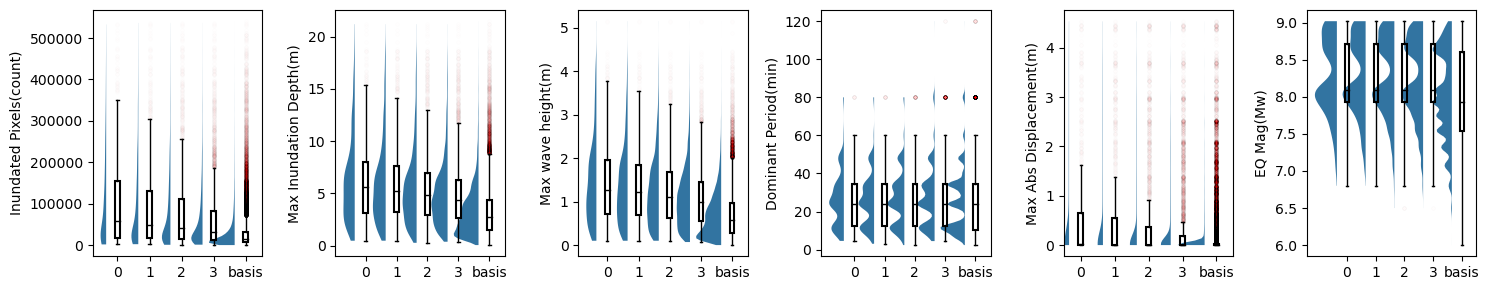

In [21]:
import seaborn as sns
import matplotlib.transforms as mtransforms
#create box plot for train and overall parallelly: for variables(true,truemax,max_off,dominant period,max_absdz,mag) 
variables = ['true','truemax','max_off','dominant_period','max_absdz','Mag']
labels = ['Inundated Pixels(count)','Max Inundation Depth(m)','Max wave height(m)','Dominant Period(min)','Max Abs Displacement(m)','EQ Mag(Mw)']
# Create the figure and axes
fig, axs = plt.subplots(1, 6, figsize=(15,3))
# Create a box plot for each variable
for i, var in enumerate(variables):
    #create a tmp df for each variable for one site
    #two ax for box plot and violin plot
    ax = axs.flatten()[i]
    tmp_df = pd.DataFrame({labels[i]: train_df_CT[var], 'split': train_df_CT['split'],'size':train_df_CT['size']})
    
    #1
    # sns.violinplot(x='split', y=labels[i], data=tmp_df, ax=ax,width=0.5,hue='split',#order=['train','test']
    #                split=True,inner=None,edgecolor='none',palette='PRGn',inner_kws={"alpha":1})
    # sns.violinplot(x='split', y=labels[i], data=tmp_df, ax=ax,width=0.5,hue='split',#order=['train','test']
    #                split=True,inner=None,edgecolor='none',palette='PRGn',inner_kws={"alpha":1})
    
    vp = sns.violinplot(tmp_df, x="size", y=labels[i], hue = 1, split=True, ax=ax,inner=None,edgecolor='none',cut=0,legend=False)

    #2
    #create list of boxplot_data and flatten
    boxplot_data = [[tmp_df[tmp_df["size"] == size][labels[i]].values] for size in ['0','1','2','3','basis']]
    boxplot_data = [item for sublist in boxplot_data for item in sublist]

    # Create the boxplot
    bp = ax.boxplot(boxplot_data,patch_artist=True,showfliers=True,
            boxprops=dict(facecolor='none', color='k',linewidth=1.5),
            medianprops=dict(color='k',linewidth=1),
            widths=0.15,
            flierprops=dict(marker='o', markerfacecolor='r',markersize=3,alpha=0.005,linestyle='none'),
            whiskerprops=dict(color='k',linewidth=1),
            capprops=dict(color='k',linewidth=1),positions=[0.75,1.75,2.75,3.75,4.75])

    # #3
    # data = tmp_df[tmp_df['split']=='train'][labels[i]]
    # x = np.random.uniform(high=0.0025, size=len(data)) + 0.005
    # y = data 
    # ax.scatter(x,y,alpha=0.25,s=4,color='grey')

    #replace xtick labels
    axs.flatten()[i].set_xlabel('')
    axs.flatten()[i].set_xticklabels(['0','1','2','3','basis'])

# plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
# plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/boxplot_CT_size1.png', transparent=False)

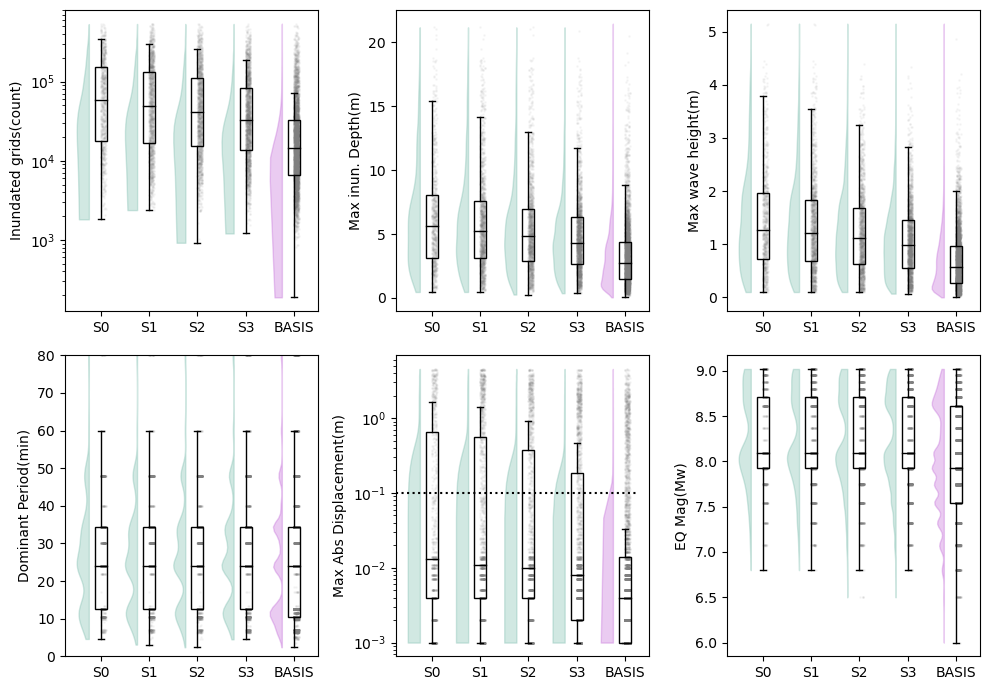

In [186]:
fig, axs = plt.subplots(2, 3, figsize=(10,7))
for i, var in enumerate(variables):
    ax = axs.flatten()[i]
    tmp_df = pd.DataFrame({labels[i]: train_df_CT[var], 'size':train_df_CT['size']})

    #create list of boxplot_data and flatten
    boxplot_data = [[tmp_df[tmp_df["size"] == size][labels[i]].values] for size in ['0','1','2','3','basis']]
    boxplot_data = [item for sublist in boxplot_data for item in sublist]
    
    # Violinplot data
    vp = ax.violinplot(boxplot_data,showmeans=False, showextrema=False, showmedians=False)
    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the left half of the violin plot
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        # Change to the desired color
        if idx == 4:
            b.set_color('mediumorchid')
        else:
            b.set_color('#69b3a2')

    # Scatterplot data, use a random percentage of the data to avoid overplotting
    for idx, features in enumerate(boxplot_data):
        #reduce data points to 10% of the original data for last idx
        if idx == 4:
            features = features[::10]
        elif idx == 3:
            features = features[::3]
        elif idx == 2:
            features = features[::2]
        # Add jitter effect so the features do not overlap on the y-axis
        x = np.full(len(features), idx + 1) #some offset
        idxs = np.arange(len(x))
        out = x.astype(float)
        out.flat[idxs] += np.random.uniform(low=-0.05, high=.05, size=len(idxs))
        x = out+0.3
        ax.scatter(x,features, s=1, color='grey', alpha=0.05)

    bp = ax.boxplot(boxplot_data,patch_artist=True,showfliers=False, positions=[1.25,2.25,3.25,4.25,5.25],
            boxprops=dict(facecolor='none', color='k',linewidth=1),
            medianprops=dict(color='k',linewidth=1),
            widths=0.25,
            flierprops=dict(marker='d', markerfacecolor='r',markersize=3,alpha=0.005,linestyle='none'),
            whiskerprops=dict(color='k',linewidth=1),
            capprops=dict(color='k',linewidth=1),)
    ax.set_xlabel('')
    ax.set_xticklabels(['S0','S1','S2','S3','BASIS'])
    ax.set_ylabel(labels[i])
    if i == 0:
        #set values as scientific notation
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,1))
        ax.set_yscale('log')
    if i ==4:
        #set y values as specific values, as streched
        ax.set_yscale('log')
        ax.hlines(0.1,0.5,5.5,linestyles='dotted',color='k')
    if i ==3:
        #set x limit for dominant period
        ax.set_ylim(0,80)
    #add padding to x-axis
    ax.set_xlim(0.5,5.75)
plt.tight_layout()
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/boxplot_CT_trainbasis.png',dpi=600)

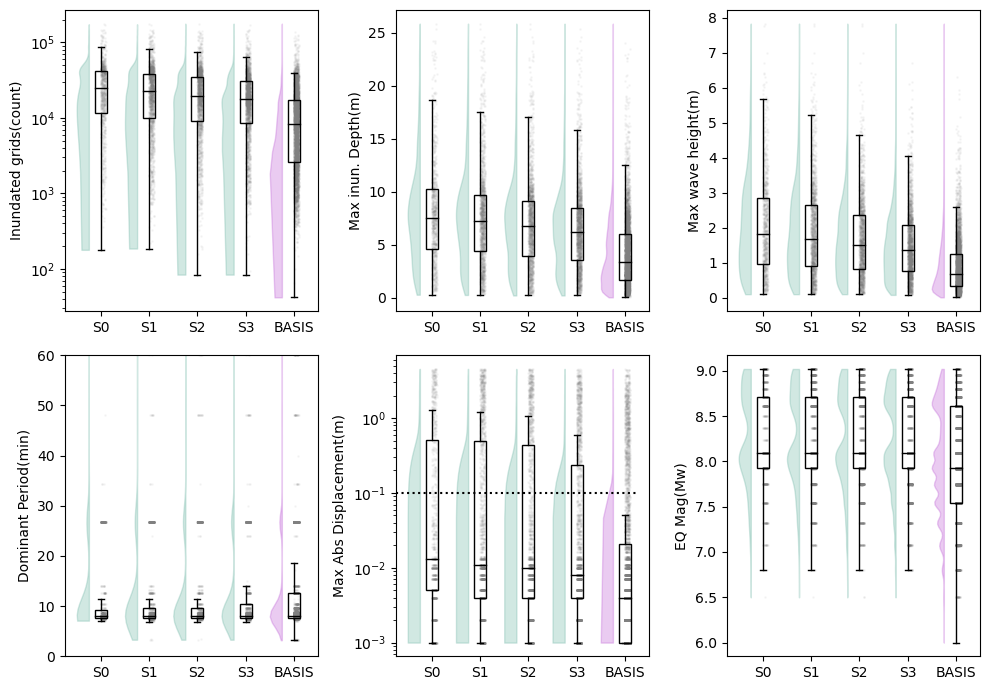

In [187]:
fig, axs = plt.subplots(2, 3, figsize=(10,7))
for i, var in enumerate(variables):
    ax = axs.flatten()[i]
    tmp_df = pd.DataFrame({labels[i]: train_df_SR[var], 'size':train_df_SR['size']})

    #create list of boxplot_data and flatten
    boxplot_data = [[tmp_df[tmp_df["size"] == size][labels[i]].values] for size in ['0','1','2','3','basis']]
    boxplot_data = [item for sublist in boxplot_data for item in sublist]
    
    # Violinplot data
    vp = ax.violinplot(boxplot_data,showmeans=False, showextrema=False, showmedians=False)
    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the left half of the violin plot
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        # Change to the desired color
        if idx == 4:
            b.set_color('mediumorchid')
        else:
            b.set_color('#69b3a2')

    # Scatterplot data, use a random percentage of the data to avoid overplotting
    for idx, features in enumerate(boxplot_data):
        #reduce data points to 10% of the original data for last idx
        if idx == 4:
            features = features[::10]
        elif idx == 3:
            features = features[::3]
        elif idx == 2:
            features = features[::2]
        # Add jitter effect so the features do not overlap on the y-axis
        x = np.full(len(features), idx + 1) #some offset
        idxs = np.arange(len(x))
        out = x.astype(float)
        out.flat[idxs] += np.random.uniform(low=-0.05, high=.05, size=len(idxs))
        x = out+0.3
        ax.scatter(x,features, s=1, color='grey', alpha=0.05)

    bp = ax.boxplot(boxplot_data,patch_artist=True,showfliers=False, positions=[1.25,2.25,3.25,4.25,5.25],
            boxprops=dict(facecolor='none', color='k',linewidth=1),
            medianprops=dict(color='k',linewidth=1),
            widths=0.25,
            flierprops=dict(marker='d', markerfacecolor='r',markersize=3,alpha=0.005,linestyle='none'),
            whiskerprops=dict(color='k',linewidth=1),
            capprops=dict(color='k',linewidth=1),)
    ax.set_xlabel('')
    ax.set_xticklabels(['S0','S1','S2','S3','BASIS'])
    ax.set_ylabel(labels[i])
    if i == 0:
        #set values as scientific notation
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,1))
        ax.set_yscale('log')
    if i ==4:
        #set y values as specific values, as streched
        ax.set_yscale('log')
        ax.hlines(0.1,0.5,5.5,linestyles='dotted',color='k')
    if i ==3:
        #set x limit for dominant period
        ax.set_ylim(0,60)
    #add padding to x-axis
    ax.set_xlim(0.5,5.75)
plt.tight_layout()
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/boxplot_SR_trainbasis.png',dpi=600)

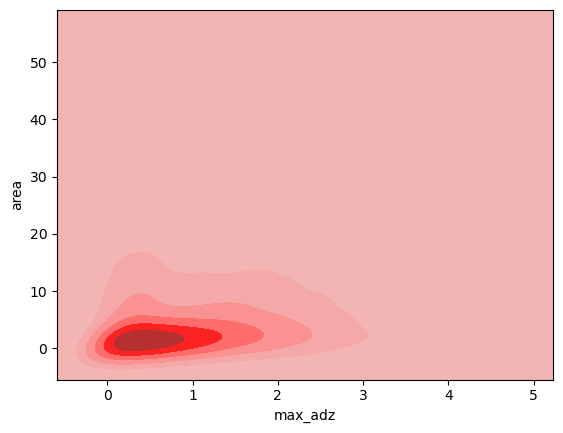

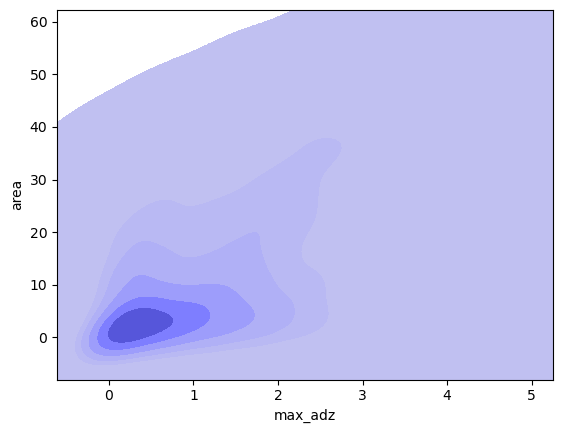

In [4]:
num_bins = 7

#merge df and df_ht as dfull
dfull = df.merge(df_ht, on='id')
dfull = dfull[dfull["max_adz"]>0.1]
dfull["count"] = dfull["count"]*0.0001

sns.kdeplot(data=dfull[(dfull["dzmin"]<-0.1)],x="max_adz", y="count",color="red",levels=7, thresh=0,fill=True, label="uplift")
plt.ylabel("area")
plt.show()
sns.kdeplot(data=dfull[(dfull["dzmax"]>0.1)],x="max_adz", y="count", color="blue",levels=7, thresh=0,fill=True,label="subsidence")
plt.ylabel("area")
plt.show()

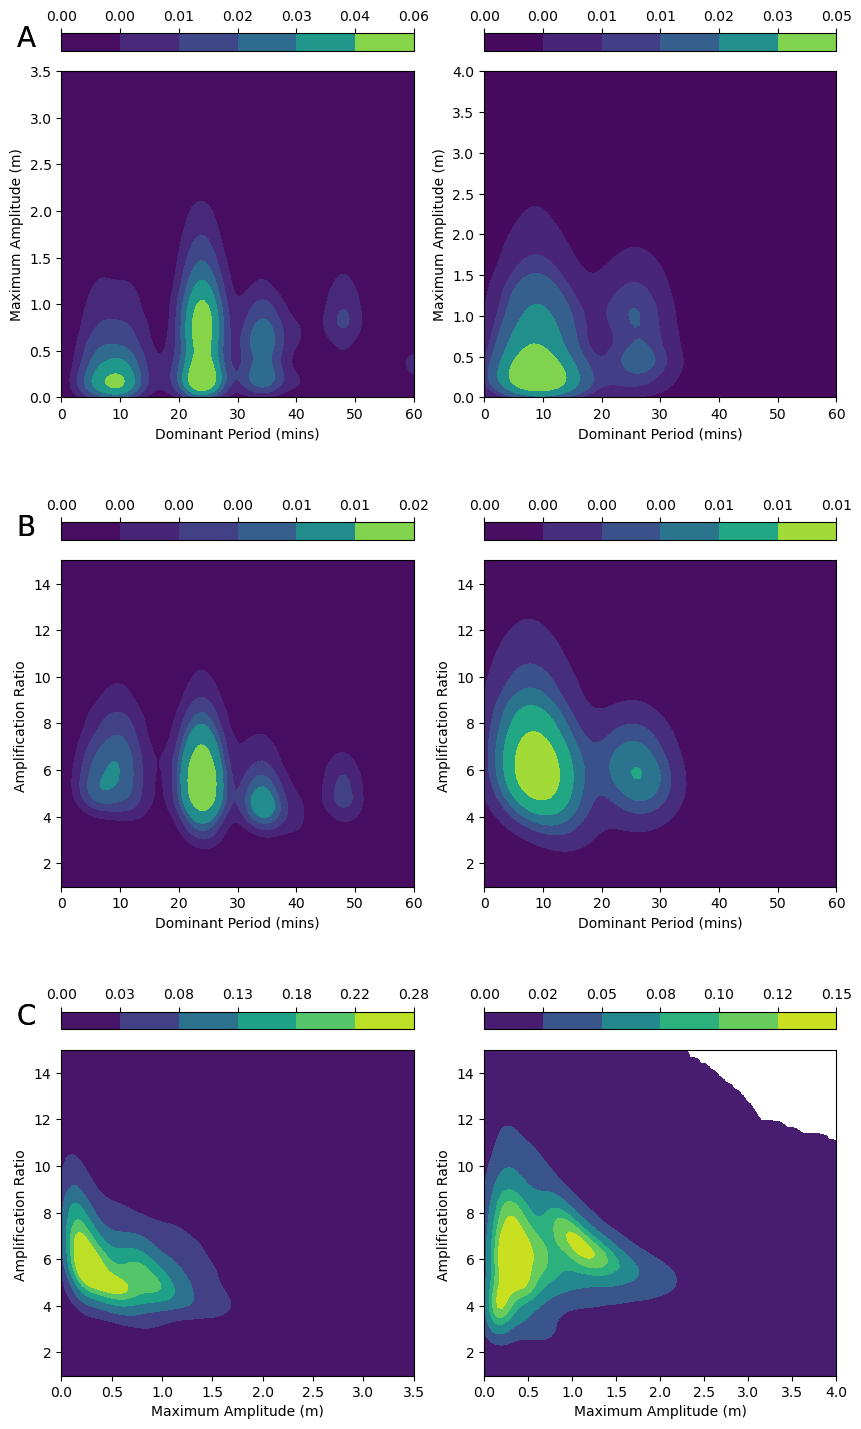

In [2]:
num_bins = 7

#combine both into one layout parallel to each other
fig, ax = plt.subplots(3,2, figsize=(10, 18))

sns.kdeplot(ax=ax[0,0], data=df, x='dominantperiod', y='max_amp', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[1,0], data=df, x='dominantperiod', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[2,0], data=df, x='max_amp', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))

sns.kdeplot(ax=ax[0,1], data=df2, x='dominantperiod', y='max_amp', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[1,1], data=df2, x='dominantperiod', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[2,1], data=df2, x='max_amp', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))

ax[0,0].set_xlim(0, 60)
ax[0,0].set_ylim(0, 3.5)
ax[0,0].set_xlabel('Dominant Period (mins)')
ax[0,0].set_ylabel('Maximum Amplitude (m)')
ax[0,0].text(-0.1,1.1,'A',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)

ax[0,1].set_xlim(0, 60)
ax[0,1].set_ylim(0, 4)
ax[0,1].set_xlabel('Dominant Period (mins)')
ax[0,1].set_ylabel('Maximum Amplitude (m)')
ax[0,1].text(-0.1,1.1,'A',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)

ax[1,0].set_xlim(0, 60)
ax[1,0].set_ylim(1, 15)
ax[1,0].set_xlabel('Dominant Period (mins)')
ax[1,0].set_ylabel('Amplification Ratio ')
ax[1,0].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)

ax[1,1].set_xlim(0, 60)
ax[1,1].set_ylim(1, 15)
ax[1,1].set_xlabel('Dominant Period (mins)')
ax[1,1].set_ylabel('Amplification Ratio ')
ax[1,1].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)

ax[2,0].set_xlim(0, 3.5)
ax[2,0].set_ylim(1, 15)
ax[2,0].set_xlabel('Maximum Amplitude (m)')
ax[2,0].set_ylabel('Amplification Ratio ')
ax[2,0].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[2,0].transAxes,fontsize=20)

ax[2,1].set_xlim(0, 4)
ax[2,1].set_ylim(1, 15)
ax[2,1].set_xlabel('Maximum Amplitude (m)')
ax[2,1].set_ylabel('Amplification Ratio ')
ax[2,1].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[2,0].transAxes,fontsize=20)

plt.savefig('./plots/distributionDP.png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
num_bins = 7

#combine both into one layout parallel to each other
fig, ax = plt.subplots(3,2, figsize=(10, 18))

sns.kdeplot(ax=ax[0,0], data=df, x='waveperiod', y='max_amp', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[1,0], data=df, x='waveperiod', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[2,0], data=df, x='max_amp', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))

sns.kdeplot(ax=ax[0,1], data=df2, x='waveperiod', y='max_amp', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[1,1], data=df2, x='waveperiod', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[2,1], data=df2, x='max_amp', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))

ax[0,0].set_xlim(0, 60)
ax[0,0].set_ylim(0, 3.5)
ax[0,0].set_xlabel('Wave Period (mins)')
ax[0,0].set_ylabel('Maximum Amplitude (m)')
ax[0,0].text(-0.1,1.1,'A',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)

ax[0,1].set_xlim(0, 60)
ax[0,1].set_ylim(0, 4)
ax[0,1].set_xlabel('Wave Period (mins)')
ax[0,1].set_ylabel('Maximum Amplitude (m)')
ax[0,1].text(-0.1,1.1,'A',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)

ax[1,0].set_xlim(0, 60)
ax[1,0].set_ylim(1, 15)
ax[1,0].set_xlabel('Wave Period (mins)')
ax[1,0].set_ylabel('Amplification Ratio ')
ax[1,0].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)

ax[1,1].set_xlim(0, 60)
ax[1,1].set_ylim(1, 15)
ax[1,1].set_xlabel('Wave Period (mins)')
ax[1,1].set_ylabel('Amplification Ratio ')
ax[1,1].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)

ax[2,0].set_xlim(0, 3.5)
ax[2,0].set_ylim(1, 15)
ax[2,0].set_xlabel('Maximum Amplitude (m)')
ax[2,0].set_ylabel('Amplification Ratio ')
ax[2,0].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[2,0].transAxes,fontsize=20)

ax[2,1].set_xlim(0, 4)
ax[2,1].set_ylim(1, 15)
ax[2,1].set_xlabel('Maximum Amplitude (m)')
ax[2,1].set_ylabel('Amplification Ratio ')
ax[2,1].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[2,0].transAxes,fontsize=20)

plt.savefig('./plots/distributionWP.png', dpi=600, bbox_inches='tight')
plt.show()


Histograms / Inundation Area

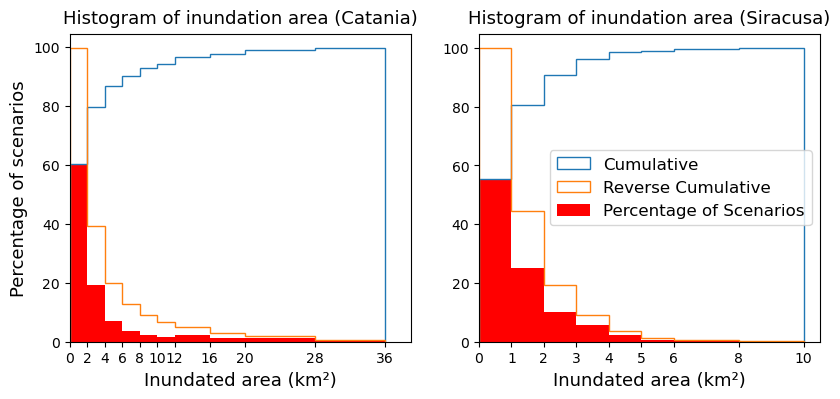

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 


#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.0, 12, 2)
bins_CT1  = np.arange( 12, 20, 4)
bins_CT2=  np.arange( 20, 42, 8)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0, 4, 1)
bins_SR1  = np.arange( 4, 6, 1)
bins_SR2=  np.arange( 6, 12, 2)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))



fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df_ht['count']*0.0001
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2_ht['count']*0.0001
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
ax1.set_xlim(0, 39)
ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Inundated area (km²)', fontsize = 13)
ax2.set_xlabel('Inundated area (km²)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.text(0.5,1.05,r'Histogram of inundation area (Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of inundation area (Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/inundation_area_hist.png', dpi=600, bbox_inches='tight')
plt.show()

Inundation Height

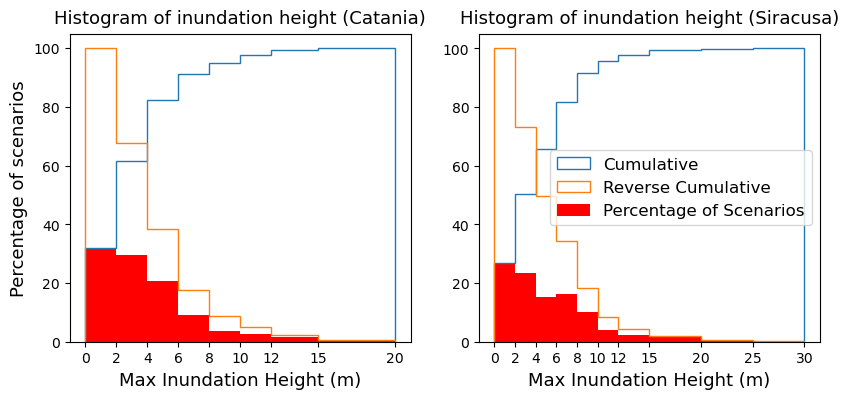

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 


#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.0, 12, 2)
bins_CT1  = np.arange( 12, 15, 3)
bins_CT2=  np.arange( 15, 25, 5)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0.0, 12, 2)
bins_SR1  = np.arange( 12, 15, 3)
bins_SR2=  np.arange( 15, 35, 5)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df_ht['hmax']
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2_ht['hmax']
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
# ax1.set_xlim(0, 39)
# ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Max Inundation Height (m)', fontsize = 13)
ax2.set_xlabel('Max Inundation Height (m)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.text(0.5,1.05,r'Histogram of inundation height (Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of inundation height (Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/inundation_height_hist.png', dpi=600, bbox_inches='tight')
plt.show()


Historgram Offshore height 

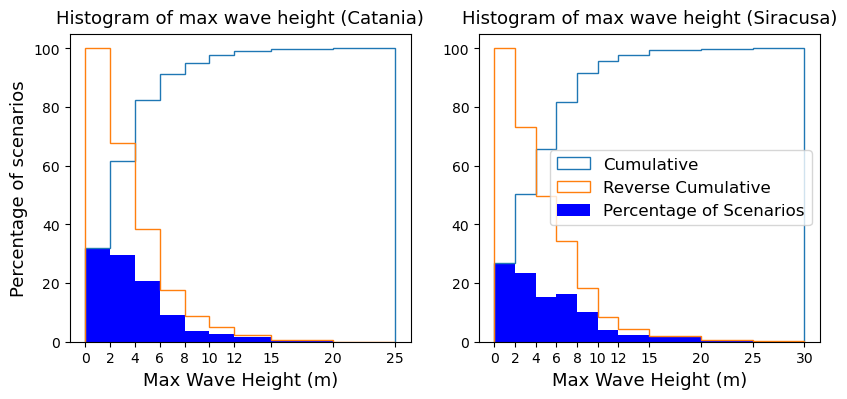

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 
#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.0, 12, 2)
bins_CT1  = np.arange( 12, 15, 3)
bins_CT2=  np.arange( 15, 30, 5)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0.0, 12, 2)
bins_SR1  = np.arange( 12, 15, 3)
bins_SR2=  np.arange( 15, 35, 5)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df['max_ht']
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'Blue',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2['max_ht']
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'Blue',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
# ax1.set_xlim(0, 39)
# ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Max Wave Height (m)', fontsize = 13)
ax2.set_xlabel('Max Wave Height (m)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.text(0.5,1.05,r'Histogram of max wave height (Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of max wave height (Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/wave_height_hist.png', dpi=600, bbox_inches='tight')
plt.show()


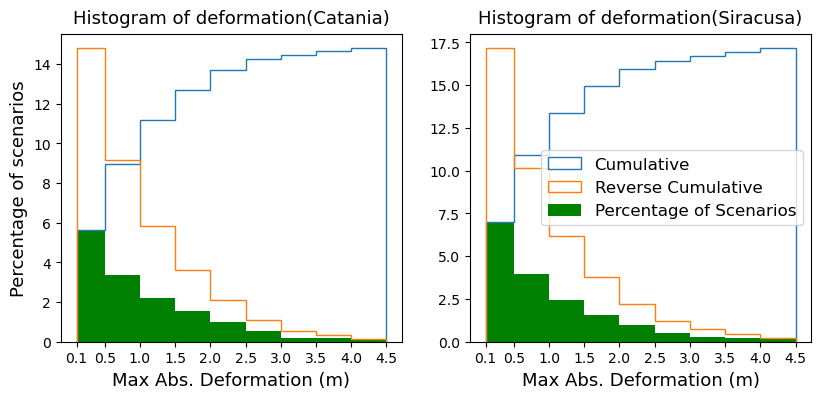

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 


#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.1, 0.1, 0.1)
bins_CT1  = np.arange( 0.1, 0.5, 0.5)
bins_CT2=  np.arange( 0.5, 5, 0.5)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0.1, 0.1, 0.1)
bins_SR1  = np.arange( 0.1, 0.5, 0.5)
bins_SR2=  np.arange( 0.5, 5, 0.5)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df['max_adz']
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'green',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2['max_adz']
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'green',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
# ax1.set_xlim(0, 39)
# ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Max Abs. Deformation (m)', fontsize = 13)
ax2.set_xlabel('Max Abs. Deformation (m)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.ticklabel_format(axis='x', style='sci', scilimits=(1,0))
ax1.text(0.5,1.05,r'Histogram of deformation(Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of deformation(Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/deform_hist.png', dpi=600, bbox_inches='tight')
plt.show()


In [12]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img4 = Image.open('./plots/deform_hist.png')
img3 = Image.open('./plots/wave_height_hist.png')
img2 = Image.open('./plots/inundation_height_hist.png')
img1 = Image.open('./plots/inundation_area_hist.png')

#merge to one image vertically
images = [img4, img3]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_hist1.png')

#merge to one image vertically
images = [img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_hist2.png')



In [1]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img4 = Image.open('./plots/deform_hist.png')
img3 = Image.open('./plots/wave_height_hist.png')
img2 = Image.open('./plots/inundation_height_hist.png')
img1 = Image.open('./plots/inundation_area_hist.png')

#merge to one image vertically
images = [img4, img3, img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_hist.png')


In [2]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img2 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1658_combined.png')
img1 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1773_combined.png')

#merge to one image vertically
images = [img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_result.png')


In [ ]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img2 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1658_combined.png')
img1 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1773_combined.png')

#merge to one image vertically
images = [img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_trainsize.png')
